# Practical 6: Machine Learning

The aim of this lab is to use learn to use k-means clustering to provide labels to data on which to perform supervised machine learning.

We will use __[scikit-learn](https://scikit-learn.org/stable/)__ as the machine learning toolbox.

The data for this practical is the *Health New in Twitter* dataset provided __[here](https://archive.ics.uci.edu/ml/datasets/Health+News+in+Twitter)__ through the UCI Machine Learning repository. This dataset contains tweets of health news from more than 15 major health news agencies such as BBC, CNN, and NYT. A copy of this data is in Keats. Before commencing this practical, please download it, unzip it, and place it in the same folder you are running this program from.

<hr style="border:1px solid black"> </hr>

## Step 1: Vectorise the tweets

To perform clustering, we first need to convert the tweets into numerical attribute. Raw tweet data can contain many forms of noise that need to be removed; e.g., numerical values, punctuation, special characters, ids, URLs, etc. This preprocessing is necessary as these type of data do not aid any meaningful information relating to health, and if leaft in could reduced the performance of our system. 

The function below can be called on set of folders from the *Health New in Twitter* data. It removed unwanted attributes from the individual tweets, and returns them in a pandas data frame. 

In [63]:
import random as rd
import re
import math
import string
import pandas as pd

def pre_process_tweets(data_path):
    
    data = pd.DataFrame(columns=['body_text'])
    for dp in data_path:

        f = open(dp, "r", encoding="utf8")
        tweets = list(f)
        list_of_tweets = []

        for i in range(len(tweets)):

            # remove \n from the end after every sentence
            tweets[i] = tweets[i].strip('\n')

            # Remove the tweet id and timestamp
            tweets[i] = tweets[i][50:]

            # Remove any word that starts with the symbol @
            tweets[i] = " ".join(filter(lambda x: x[0] != '@', tweets[i].split()))

            # Remove any URL
            tweets[i] = re.sub(r"http\S+", "", tweets[i])
            tweets[i] = re.sub(r"www\S+", "", tweets[i])

            # remove colons from the end of the sentences (if any) after removing url
            tweets[i] = tweets[i].strip()
            tweet_len = len(tweets[i])
            if tweet_len > 0:
                if tweets[i][len(tweets[i]) - 1] == ':':
                    tweets[i] = tweets[i][:len(tweets[i]) - 1]

            # Remove any hash-tags symbols
            tweets[i] = tweets[i].replace('#', '')

            # Convert every word to lowercase
            tweets[i] = tweets[i].lower()

            # remove punctuations
            tweets[i] = tweets[i].translate(str.maketrans('', '', string.punctuation))

            # trim extra spaces
            tweets[i] = " ".join(tweets[i].split())

            # remove any integers
            tweets[i] = ''.join([i for i in tweets[i] if not i.isdigit()])

            data = data.append({'body_text': tweets[i]},ignore_index=True)

        f.close()

    return data

The following code calls this function on the CBC and CNN tweets and returns a single data frame containing both 

In [64]:
training_data_path = ['Health-Tweets/cbchealth.txt','Health-Tweets/cnnhealth.txt']
tweets = pre_process_tweets(training_data_path)
tweets.head(25)

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

body_text
0   drugs need careful monitoring for expiry dates...
1                         sabra hummus recalled in us
2   us sperm bank sued by canadian couple didnt ve...
3   manitoba pharmacists want clampdown on tylenol...
4   mom of  spooked by vaccinations reverses stand...
5   hamilton police send mental health pros to the...
6   wind turbine noise linked to only  health issu...
7   wild west of ecigarettes sparks debate over re...
8   dementia patients sold unproven brainwave opti...
9   passengers on second chinavancouver flight in ...
10  check expiry dates health canada advises after...
11  hashtagging eating disorders help or hindrance...
12  obama says memory of daughters preschool asthm...
13  women into healing accused of failing drug add...
14    expired alesse birth control exposes deficiency
15  despite paying top dollar some military mental...
16  boys severe peanut fish allergies traced to bl...
17  weight watchers jenny craig get best marks in ...
18  cancerstricken baby from whitehorse awaiting l...
19  avian flu confirmed on turkey farm near woodstock
20  sperm donors criminal record schizophrenia all...
21  shoppers drug mart mistakenly sells expired bi...
22  fracking criticism spreads even in alberta and...
23  fake oxycontin suspected in od death of moose ...
24  bc doctor geoffrey harding slain on vacation i...

We now parameterise the extracted tweets using *Term Frequency-Inverse Document Frequency* (TF-IDF) vectorisation. It is a algorithm that calculates features based  on the importance of words in the corpus or dataset. For more information on TF-IDF see __[here](https://medium.com/acing-ai/what-is-tf-idf-in-feature-engineering-7f1ba81982bd)__. 

**Question** What is the purpose of the max_features variable?

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 500)
tfidf_vectors = vectorizer.fit(tweets['body_text'])
X = tfidf_vectors.transform(tweets['body_text'])

In [73]:
X

<7802x500 sparse matrix of type '<class 'numpy.float64'>'
	with 46796 stored elements in Compressed Sparse Row format>

Once we extracted the TF-IDF, we convert them to a numpy array. 

In [29]:
import numpy as np

X = X.toarray()

<hr style="border:1px solid black"> </hr>

## Step 2: Perform k-means clustering

The core hyperparamter to tune when performing k-means is the numbers of clusters.

A simple way to find this is to use the *Elbow Method*. To do this we first compute k-means for a range of different values of k; can you see where this is done in the code below? 

For each cluster we consider the total intra-cluster variation, as measure using the *within-cluster sum of square* (WCSS). Again, can you see where this is done in the code below? 


Our goal is to minimize WCSS. To determine this point, we plot the WCSS curve against the number of clusters. The elbow or bend in this plot is considered to be the appropriate number of clusters for the task at hand.

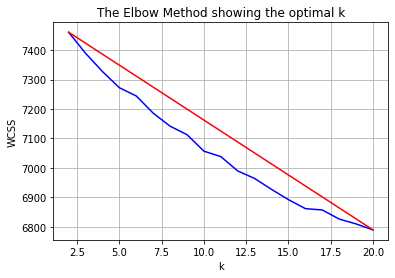

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# run kmeans with many different k
WCSS = []
K = range(2, 21)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    WCSS.append(km.inertia_)

X_line = [K[0], K[-1]]
Y_line = [WCSS[0], WCSS[-1]]    

# Plot the elbow
plt.plot(K, WCSS, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.grid()
plt.show()

Based on the plot above, 8 clusters seems a reasonable choice for the range of cluster we have tested over. 

The next step is to create the final K-mean model and extract the centroid for each instance in our data. We will use the centroid as label for supervised learning later in the lab.

In [30]:
K_final = 8
kmeans = KMeans(n_clusters=K_final, random_state=42)
y = kmeans.fit_predict(X)

Finally, we can check out what our clusters look like using __[Principle Componenet Analysis](https://www.edureka.co/blog/principal-component-analysis/)__ to allow us to veiw the cluster in two dimensions. 

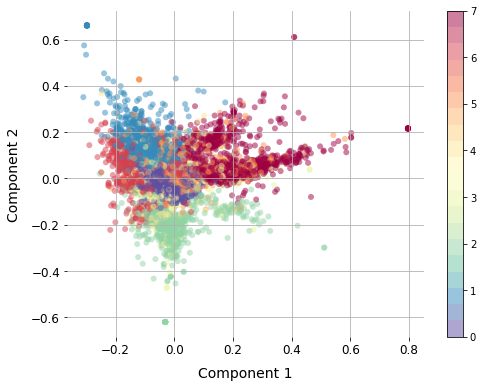

In [59]:
from sklearn.decomposition import PCA

fig, ax = plt.subplots(figsize = (8, 6))

pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)
plt.scatter(pca_2d[:, 0], pca_2d[:, 1],
            c=y, 
            edgecolor="none", 
            cmap=plt.cm.get_cmap("Spectral_r", 20),
            alpha=0.5)
        
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("Component 1", size = 14, labelpad=10)
plt.ylabel("Component 2", size = 14, labelpad=10)


plt.colorbar(ticks=range(0,K_final));
plt.grid()
plt.show()

<hr style="border:1px solid black"> </hr>

## Step 3: Perform classification on the newly labelled data

What classification technique is being used in the code below? 

Decribe the key steps being taken in the provided code.

Run the code, it may take a few minutes. 

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

n_folds = 5
kf_Strat = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)


SVM_cost = [0.001, 0.01]
accuracy_SVM = np.zeros((len(SVM_cost),n_folds), dtype=float)

fld_cnt = 0
for train_index, test_index in kf_Strat.split(X, y):
    
    print("Processing fold " + str((fld_cnt+1)))
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    
    min_max_scaler = MinMaxScaler()
    X_train_minmax = min_max_scaler.fit_transform(X_train)
    X_test_minmax = min_max_scaler.transform(X_test)
    
    grid_cnt = 0 
    for cst in SVM_cost:
    
        svmClas_CFV = SVC(kernel='rbf', C = cst, random_state=42) 
        svmClas_CFV.fit(X_train_minmax, y_train)
        y_pred = svmClas_CFV.predict(X_test_minmax)
                
        accuracy_SVM[grid_cnt, fld_cnt] = accuracy_score(y_test, y_pred)
        
        grid_cnt += 1
    

    fld_cnt += 1

accuracy_final = np.mean(accuracy_SVM, axis = 1)  
max_ind_SVM = np.argmax(accuracy_final)

accuracy_best = accuracy_final[max_ind_SVM]
final_cost =  SVM_cost[max_ind_SVM]

print( "Classification of tweets: Accuracy " + str(round(accuracy_best, 3)) +
      " with Cost " + str(final_cost))

Processing fold 1
Processing fold 2
Processing fold 3
Processing fold 4
Processing fold 5
Classification of tweets: Accuracy 0.318 with Cost 0.001


**Questions** 
- Is this higher or lower than you expected? 
- What could be done  (in the classification code) to improve this? Implement this in the above code

In [33]:
max_ind_SVM

0

<hr style="border:1px solid black"> </hr>

## Exercise 1

- Extract TF-IDF vectors for the New York Times data
- Using the trained k-means model from earlier, extact the centroids
- Using the best hyperparameter found in the classification expirement earlier, train a new classifier using the CBC and CNN tweets (and their centroids) as training material and test this new classifier on the NY-Times tweets
- Is this results what you expected? Why? 

In [74]:
data_path = ['Health-Tweets/nytimeshealth.txt']
tweets = pre_process_tweets(data_path)
tweets.head(25)

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)


body_text
0   risks in using social media to spot signs of m...
1   rt the most effective nationwide diabetes prev...
2   the new old age blog diabetes prevention that ...
3          well comfort casseroles for winter dinners
4   highlevel knowledge before veterans affairs sc...
5   your money affordable care act’s tax effects n...
6                      well christmas in the hospital
7   the texas tribune for members of health minist...
8   a qampa with laura hillenbrand author of unbro...
9     race to deliver nicotine’s punch with less risk
10  the new health care people are shopping for he...
11  machine learning bedtime technology for a bett...
12  breaking lab error may have exposed us technic...
13  cdc ebola error in lab may have exposed techni...
14  rt breaking news lab error may have exposed us...
15  a qampa with laura hillenbrand author of unbro...
16  rt virus that killed a kansas farmer is identi...
17             well exercise to lose weight stay warm
18  business briefing diabetes drug gains approval...
19  so far  million obtain health care coverage fo...
20  dealbook inquiry into foreign bribes at biomet...
21  firing of va clinic chief is upheld over gifts...
22  world briefing ireland doctors seek to remove ...
23  plastic surgery tourism brings chinese to sout...
24  looking for a better nights sleep put down tha...

In [79]:
# Training process
# Vectorise
X_test = tfidf_vectors.transform(tweets['body_text'])
X_test = X_test.toarray()

y_test = kmeans.predict(X_test)

# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_test)

# Define model
svm = SVC(kernel='linear', C=0.001, random_state=42)
svm.fit(X_scaled, y_test)

y_pred = svm.predict(X_scaled)

accuracy_score(y_test, y_pred)

0.3074459567654123

<hr style="border:1px solid black"> </hr>

## Exercise 2

Explore different ways to improve classification of NY-times tweets. Suggestions include:
- New or expanded training data
- Varing the max_features parameter in TD-IDF extraction
- Varing the number of clusters
- Altering the classification model

In [81]:
import os

In [85]:
test_path = []
train_path = []
dir_name = 'Health-Tweets/'
for txt in os.listdir('Health-Tweets'):
    train_path.append(dir_name+txt)
    
test_path.append(train_path[-1])
train_path.remove(test_path[0])

print(train_path)
print(test_path)

['Health-Tweets/gdnhealthcare.txt', 'Health-Tweets/bbchealth.txt', 'Health-Tweets/usnewshealth.txt', 'Health-Tweets/msnhealthnews.txt', 'Health-Tweets/goodhealth.txt', 'Health-Tweets/reuters_health.txt', 'Health-Tweets/cnnhealth.txt', 'Health-Tweets/nytimeshealth.txt', 'Health-Tweets/KaiserHealthNews.txt', 'Health-Tweets/wsjhealth.txt', 'Health-Tweets/latimeshealth.txt', 'Health-Tweets/nprhealth.txt', 'Health-Tweets/NBChealth.txt', 'Health-Tweets/everydayhealth.txt', 'Health-Tweets/foxnewshealth.txt']
['Health-Tweets/cbchealth.txt']


In [88]:
tweets = pre_process_tweets(train_path)

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 4051: invalid start byte

In [89]:
vectorizer = TfidfVectorizer(max_features = 1000)
tfidf_vectors = vectorizer.fit(tweets['body_text'])
X = tfidf_vectors.transform(tweets['body_text'])

tweet_test = pre_process_tweets(test_path)
X_test = tfidf_vectors.transform(tweet_test['body_text'])

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({'body_text': tweets[i]},ignore_index=True)
/tmp/ipykernel_222809/14186609.py:53: FutureWarning: The

In [91]:
X = X.toarray()
X_test = X_test.toarray()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_test_scaled = scaler.transform(X_test)

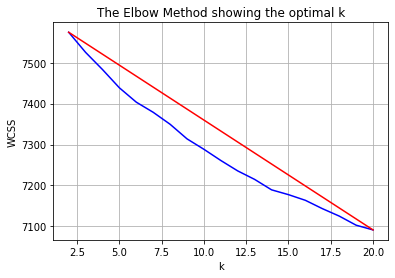

In [92]:
WCSS = []
K = range(2, 21)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    WCSS.append(km.inertia_)

X_line = [K[0], K[-1]]
Y_line = [WCSS[0], WCSS[-1]]    

# Plot the elbow
plt.plot(K, WCSS, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.grid()
plt.show()

In [93]:
kmeans = KMeans(n_clusters=8, random_state=42)
y = kmeans.fit_predict(X)

In [137]:
from sklearn.model_selection import cross_validate

kf_stratify = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model = SVC(kernel='rbf', C=1, random_state=42)

cross_validate(model, X_scaled, y, cv=kf_stratify, scoring=['accuracy'])


{'fit_time': array([37.67251611, 37.34582901, 36.23634791, 38.47910571, 35.87737513]),
 'score_time': array([6.42842913, 6.39986587, 6.05366206, 7.12147284, 6.05036259]),
 'test_accuracy': array([0.9570788 , 0.96028187, 0.95128205, 0.95192308, 0.94615385])}

In [136]:
model = SVC(kernel='rbf', C=1, shrinking=True, random_state=42)
model.fit(X_scaled, y)

# y_test = kmeans.predict(X_test)
y_pred = model.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.9986634589681903

<hr style="border:1px solid black"> </hr>

In [124]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Softmax, Flatten, Input

In [129]:
model = keras.Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(32, activation='softplus'))
model.add(Dense(16, activation='sigmoid'))
model.add(Softmax())

model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='binary_crossentropy', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['Accuracy', 'Precision', 'Recall'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )

In [130]:
model.fit(X_scaled, y)

ValueError: in user code:

    File "/home/changhyun/kcl/ml_bioinfo_hi/ml_health_bio/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/home/changhyun/kcl/ml_bioinfo_hi/ml_health_bio/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/changhyun/kcl/ml_bioinfo_hi/ml_health_bio/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/home/changhyun/kcl/ml_bioinfo_hi/ml_health_bio/lib/python3.8/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/home/changhyun/kcl/ml_bioinfo_hi/ml_health_bio/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/changhyun/kcl/ml_bioinfo_hi/ml_health_bio/lib/python3.8/site-packages/keras/engine/input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_14" (type Sequential).
    
    Input 0 of layer "dense_20" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 1000)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 1000), dtype=float32)
      • training=True
      • mask=None


(7802, 1000)